In [5]:
import pandas as pd
import numpy as np
#url ='https://raw.githubusercontent.com/khwanck/DeepLearning_NIDA01/main/winedata.csv'
url ='https://raw.githubusercontent.com/khwanck/DeepLearning_NIDA01/main/winequality-red.csv'
data=pd.read_csv(url,)
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
x=data.drop('Y',1)
y=data.Y
print(x.head(5))
print(y.head(5))

   fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8
3           11.2              0.28         0.56  ...  3.16       0.58      9.8
4            7.4              0.70         0.00  ...  3.51       0.56      9.4

[5 rows x 11 columns]
0    5
1    5
2    5
3    6
4    5
Name: Y, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0)
type(x_train)

pandas.core.frame.DataFrame

In [8]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)
type(x_train)
type(y_train)

pandas.core.series.Series

In [10]:
#x_train = x_train.to_numpy()
#y_train = y_train.to_numpy()
x_train=x_train.astype(np.float32)
y_train=y_train.astype(np.float32)
input_dim=11   # number of features 
output_dim=11   # number of output (0,1,2,...,10)
type(y_train)

numpy.ndarray

In [11]:
import sys
print(f"Python{sys.version}\n")
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

Python3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]



In [12]:
model=tf.keras.models.Sequential()
#input layer
model.add(tf.keras.Input(shape=(input_dim)))

#hidden layer
model.add(tf.keras.layers.Dense(10,activation='relu',name='Hidden1'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN1'))
model.add(tf.keras.layers.Dense(10,activation='relu',name='Hidden2'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN2'))
model.add(tf.keras.layers.Dense(10,activation='relu',name='Hidden3'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN3'))
model.add(tf.keras.layers.Dropout(0.8))

#output layer
model.add(tf.keras.layers.Dense(output_dim,activation='softmax',name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 10)                120       
                                                                 
 BN1 (BatchNormalization)    (None, 10)                40        
                                                                 
 Hidden2 (Dense)             (None, 10)                110       
                                                                 
 BN2 (BatchNormalization)    (None, 10)                40        
                                                                 
 Hidden3 (Dense)             (None, 10)                110       
                                                                 
 BN3 (BatchNormalization)    (None, 10)                40        
                                                                 
 dropout (Dropout)           (None, 10)                0

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


In [ ]:
#display(y_train)
#np.shape(y_train)

In [ ]:
#display(x_train)
#np.shape(x_train)

In [14]:
checkpoint_filepath="bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
model_checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_acc',mode='max',save_best_only=True)
history=model.fit(x_train,y_train,batch_size=100,epochs=20,verbose=1,validation_split=0.2,callbacks=[model_checkpoint_callback])

Epoch 1/20
10/10 [==============================] - 2s 37ms/step - loss: 3.2345 - acc: 0.1293 - val_loss: 2.2942 - val_acc: 0.1292
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 3.2738 - acc: 0.1314 - val_loss: 2.2745 - val_acc: 0.1167
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 3.2010 - acc: 0.1418 - val_loss: 2.2577 - val_acc: 0.1333
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 3.0311 - acc: 0.1595 - val_loss: 2.2410 - val_acc: 0.1708
Epoch 5/20
10/10 [==============================] - 0s 14ms/step - loss: 2.9505 - acc: 0.1668 - val_loss: 2.2251 - val_acc: 0.1833
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 2.9972 - acc: 0.1554 - val_loss: 2.2125 - val_acc: 0.2083
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 2.7852 - acc: 0.1773 - val_loss: 2.1985 - val_acc: 0.2250
Epoch 8/20
10/10 [==============================] - 0s 8ms/step - loss: 2.7500 - acc: 

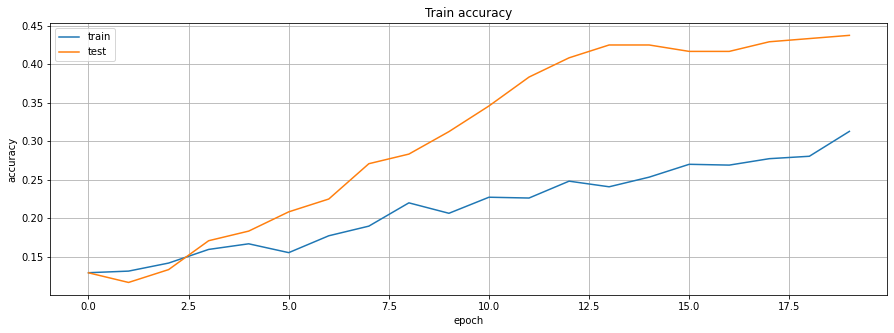

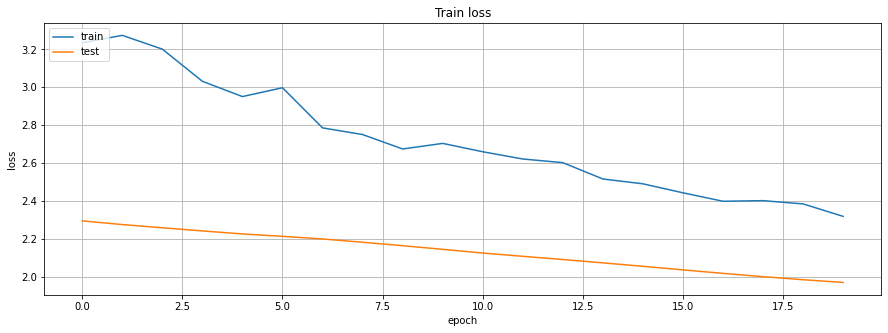

In [15]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [16]:
results = model.evaluate(x_test, y_test, batch_size=128)
print(f"{model.metrics_names} = {results}")

4/4 [==============================] - 0s 4ms/step - loss: 1.9407 - acc: 0.4375
['loss', 'acc'] = [1.9407353401184082, 0.4375]


In [37]:
# Test using the model on x_test[i]
i = 1
y_pred = model.predict(x_test[i].reshape(1,-1)) # reshape x_test[i] from (n_feature,) to (1, n_feature)

print(f"{'#'*10} Input: x_test[{i}] {'#'*10}")
print(f"shape={x_test[i].shape}\nvalue={x_test[i]}\n")

print(f"{'#'*10} Ground truth: y_test[{i}] {'#'*10}")
print(f"shape={y_test[i].shape}\nvalue={y_test[i]}\n")

print(f"{'#'*10} Prediction: y_pred {'#'*10}")
print(f"type={type(y_pred)}\ndtype={y_pred.dtype}\nshape={y_pred.shape}")
print(f"value={y_pred}")
print(f"np.argmax(y_pred)={np.argmax(y_pred)}")

########## Input: x_test[1] ##########
shape=(11,)
value=[-0.13713469  1.57906477 -1.39354657  1.04393471  0.16155451 -1.04907196
 -0.98199091  0.94818221  0.3314596  -0.72822233 -0.75660071]

########## Ground truth: y_test[1] ##########
shape=()
value=5

########## Prediction: y_pred ##########
type=<class 'numpy.ndarray'>
dtype=float32
shape=(1, 11)
value=[[0.06368035 0.11819337 0.09019939 0.12511161 0.10698646 0.07634269
  0.09378827 0.06205414 0.08642017 0.07193172 0.10529184]]
np.argmax(y_pred)=3
